In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from dtreeviz.trees import dtreeviz 

In [2]:
fruit_data = pd.read_csv(r"C:\Users\User\Desktop\Fruit\fruit.txt" , sep="\s+" )

In [3]:
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [58]:
fruit_data['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [5]:
fruit_data['fruit_label'].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
fruit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [7]:
fruit_data.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [8]:
fruit_data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [9]:
fruit_data2 = fruit_data.drop(columns = ['fruit_name'  ] , axis = 1)

In [10]:
fruit_data2.head()

,fruit_label,fruit_subtype,mass,width,height,color_score
0,1,granny_smith,192,8.4,7.3,0.55
1,1,granny_smith,180,8.0,6.8,0.59
2,1,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [11]:
fruit_data['fruit_subtype'].unique()

array(['granny_smith', 'mandarin', 'braeburn', 'golden_delicious',
       'cripps_pink', 'spanish_jumbo', 'selected_seconds', 'turkey_navel',
       'spanish_belsan', 'unknown'], dtype=object)

In [12]:
fruit_data2.replace({'granny_smith': 0 , 'mandarin': 1 ,
                     'braeburn': 0 , 'golden_delicious': 0 ,
                     'cripps_pink': 0 , 'spanish_jumbo' : 2 ,
                      'selected_seconds': 2 , 'turkey_navel':2 ,
                       'spanish_belsan': 3 , 'unknown': 3 } , inplace= True)

In [13]:
column_names = fruit_data2.columns[1:]

In [14]:
X = fruit_data2[column_names]
Y = fruit_data2.fruit_label

In [15]:
X

,fruit_subtype,mass,width,height,color_score
0,0,192,8.4,7.3,0.55
1,0,180,8.0,6.8,0.59
2,0,176,7.4,7.2,0.60
3,1,86,6.2,4.7,0.80
4,1,84,6.0,4.6,0.79
5,1,80,5.8,4.3,0.77
6,1,80,5.9,4.3,0.81
7,1,76,5.8,4.0,0.81
8,0,178,7.1,7.8,0.92
9,0,172,7.4,7.0,0.89


In [16]:
X_train , X_test , Y_train , Y_test  = train_test_split(X , Y , random_state = 42)

# DecissionTree

In [17]:
dec = DecisionTreeClassifier()
dec.fit(X_train , Y_train)

DecisionTreeClassifier()

In [18]:
dec.score(X_train , Y_train)*100

100.0

In [22]:
dec_pred = dec.predict(X_test)

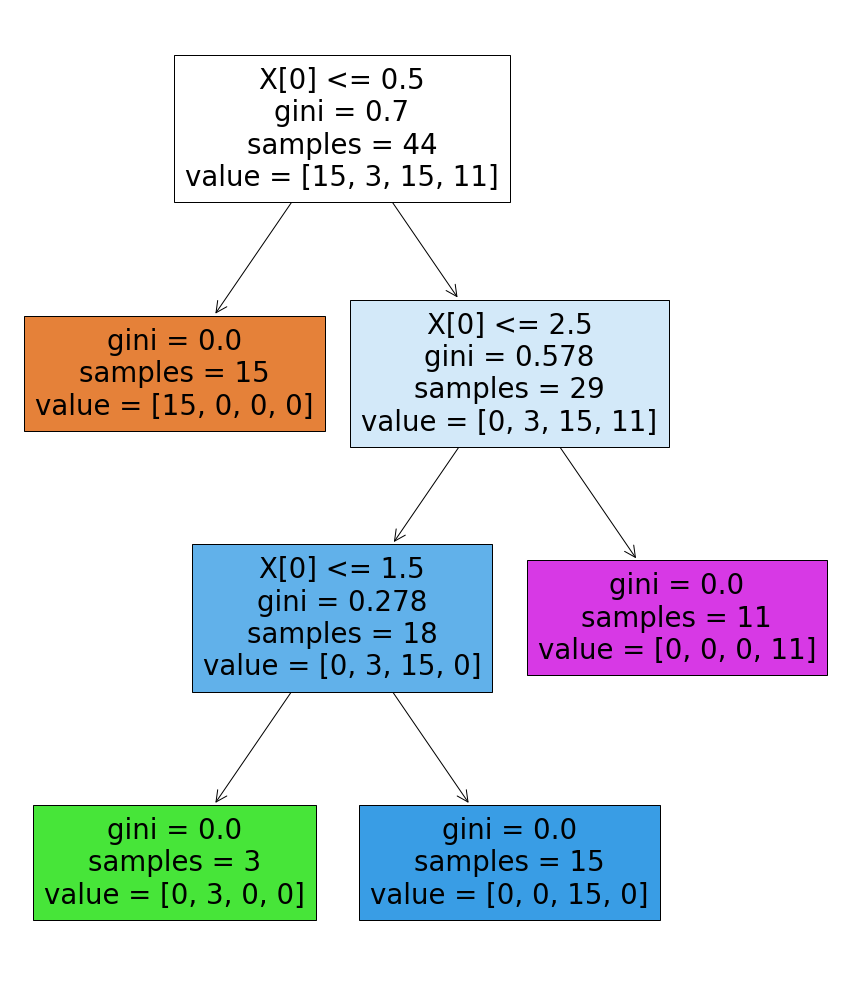

In [47]:
fig = plt.figure(figsize=(15,18))
tree.plot_tree(dec, filled= True )
plt.show()


In [48]:
fig.savefig("decistion_tree.png")

In [23]:
dec_pred

array([1, 2, 3, 1, 4, 4, 4, 3, 4, 1, 4, 2, 3, 3, 1], dtype=int64)

In [24]:
for y in dec_pred:
    if(y == 1):
        print('apple')
    elif(y == 2):
        print('mandarin')
    elif(y == 3):
        print('orange')
    else:
        print('lemon')

apple
mandarin
orange
apple
lemon
lemon
lemon
orange
lemon
apple
lemon
mandarin
orange
orange
apple
